Saving data.xlsx to data (4).xlsx
Number of data points: 88
Date range: 0 to 87
==== Unit Root Tests for Original Prices ====
ADF Test:
Statistic: -4.6894218362864075
p-value: 8.808870338829753e-05
✅ Stationary (reject null hypothesis of unit root)
KPSS Test:
Statistic: 0.17018528466241967
p-value: 0.1
✅ Stationary (fail to reject null hypothesis)
==== Correlograms for Original Prices ====


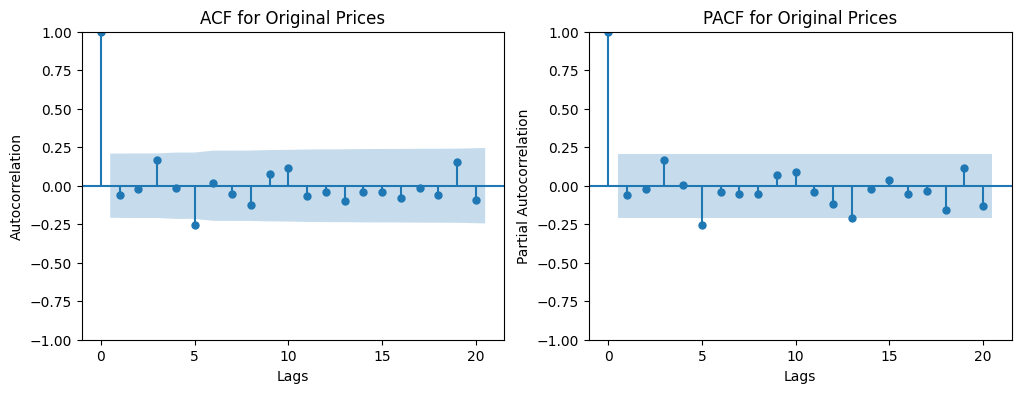

Interpretation for Original Prices:
The ACF plot shows autocorrelation coefficients at different lags; gradual decay suggests persistence or non-stationarity, while sharp cutoffs indicate MA order.
The PACF plot shows partial autocorrelations; sharp cutoffs suggest AR order, significant spikes indicate potential AR/MA terms.
==== Correlograms for First-Differenced Series ====


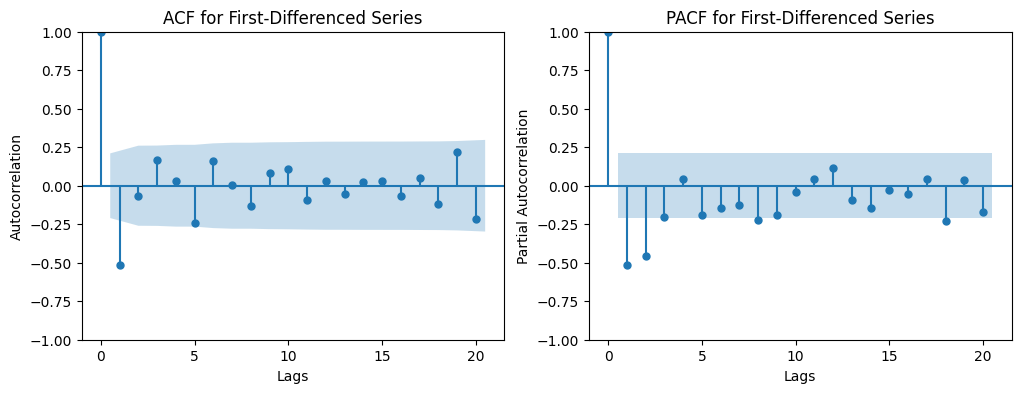

Interpretation for First-Differenced Series:
The ACF plot shows autocorrelation coefficients at different lags; gradual decay suggests persistence or non-stationarity, while sharp cutoffs indicate MA order.
The PACF plot shows partial autocorrelations; sharp cutoffs suggest AR order, significant spikes indicate potential AR/MA terms.
==== Unit Root Tests for Differenced Series ====
ADF Test:
Statistic: -5.664692308759725
p-value: 9.208982211676579e-07
✅ Stationary (reject null hypothesis of unit root)
KPSS Test:
Statistic: 0.1290509890288652
p-value: 0.1
✅ Stationary (fail to reject null hypothesis)
==== ARMA Section ====
Best ARMA order: (0, 0, 0) with AIC: -695.4065382490594
Interpretation: AR terms (p=0) capture autocorrelation, MA terms (q=0) capture shock effects, d=0 assumes stationarity.
                               SARIMAX Results                                
Dep. Variable:                    DPI   No. Observations:                   88
Model:                          ARIM

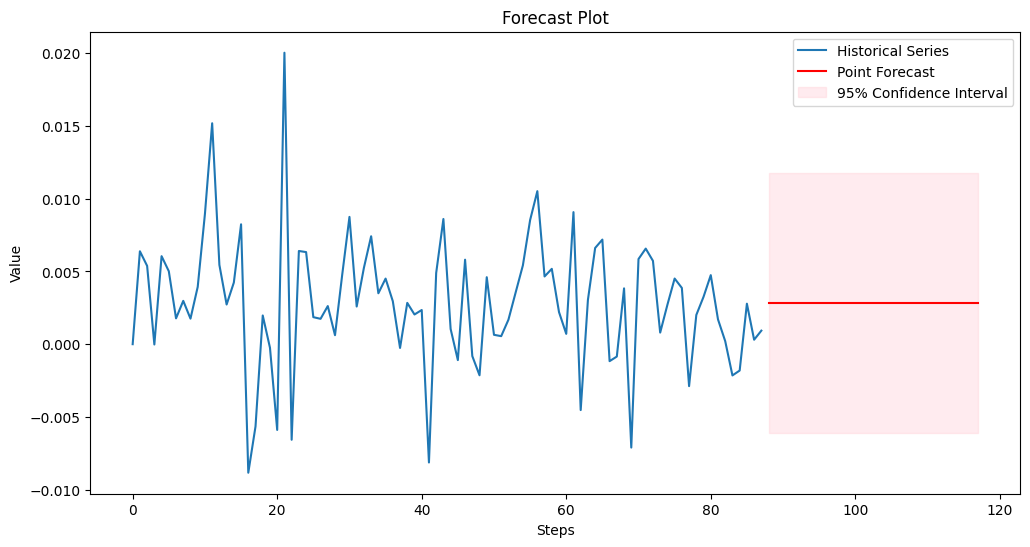

First 5 forecast values:
88    0.002847
89    0.002847
90    0.002847
91    0.002847
92    0.002847
Name: predicted_mean, dtype: float64
Last value: 0.0009314104827102966
Mean forecast: 0.0028465641497705937
Change: 0.0019151536670602971
Trend direction: upward
Final CI range: -0.0060791798266666705 to 0.011772308126207859
Note on CI width: Confidence intervals typically widen as forecasts extend further into the future, reflecting increasing uncertainty.
==== ARIMA Section ====
Best ARIMA order: (0, 0, 0) with AIC: -695.4065382490594
Interpretation: AR(p=0), I(d=0), MA(q=0); d indicates differencing for stationarity.
                               SARIMAX Results                                
Dep. Variable:                    DPI   No. Observations:                   88
Model:                          ARIMA   Log Likelihood                 349.703
Date:                Sat, 01 Nov 2025   AIC                           -695.407
Time:                        01:10:23   BIC               

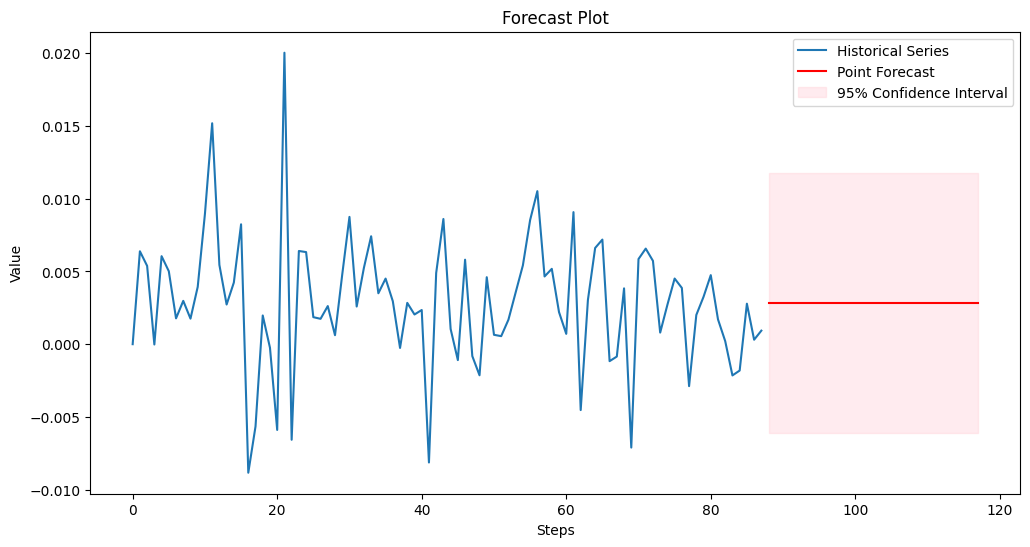

First 5 forecast values:
88    0.002847
89    0.002847
90    0.002847
91    0.002847
92    0.002847
Name: predicted_mean, dtype: float64
Last value: 0.0009314104827102966
Mean forecast: 0.0028465641497705937
Change: 0.0019151536670602971
Trend direction: upward
Final CI range: -0.0060791798266666705 to 0.011772308126207859
Note on CI width: Confidence intervals typically widen as forecasts extend further into the future, reflecting increasing uncertainty.


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings
from google.colab import files

warnings.filterwarnings('ignore')

uploaded = files.upload()
data = pd.read_excel('data.xlsx')
dpi_series = data['DPI']
print(f"Number of data points: {len(dpi_series)}")
print(f"Date range: {dpi_series.index.min()} to {dpi_series.index.max()}")

def unit_root_tests(series, name):
    print(f'==== Unit Root Tests for {name} ====')
    adf_result = adfuller(series)
    print('ADF Test:')
    print(f'Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    if adf_result[1] < 0.05:
        print('✅ Stationary (reject null hypothesis of unit root)')
    else:
        print('❌ Non-stationary (fail to reject null hypothesis)')

    kpss_result = kpss(series)
    print('KPSS Test:')
    print(f'Statistic: {kpss_result[0]}')
    print(f'p-value: {kpss_result[1]}')
    if kpss_result[1] < 0.05:
        print('❌ Non-stationary (reject null hypothesis of stationarity)')
    else:
        print('✅ Stationary (fail to reject null hypothesis)')
    print('====================')

unit_root_tests(dpi_series, 'Original Prices')

def plot_correlograms(series, name):
    print(f'==== Correlograms for {name} ====')
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0])
    axes[0].set_title(f'ACF for {name}')
    axes[0].set_xlabel('Lags')
    axes[0].set_ylabel('Autocorrelation')
    plot_pacf(series, ax=axes[1])
    axes[1].set_title(f'PACF for {name}')
    axes[1].set_xlabel('Lags')
    axes[1].set_ylabel('Partial Autocorrelation')
    plt.show()
    print(f'Interpretation for {name}:')
    print('The ACF plot shows autocorrelation coefficients at different lags; gradual decay suggests persistence or non-stationarity, while sharp cutoffs indicate MA order.')
    print('The PACF plot shows partial autocorrelations; sharp cutoffs suggest AR order, significant spikes indicate potential AR/MA terms.')
    print('====================')

plot_correlograms(dpi_series, 'Original Prices')

dpi_diff = dpi_series.diff().dropna()
plot_correlograms(dpi_diff, 'First-Differenced Series')
unit_root_tests(dpi_diff, 'Differenced Series')

def best_arma(series):
    best_aic = np.inf
    best_order = None
    for p in range(4):
        for q in range(4):
            try:
                model = ARIMA(series, order=(p, 0, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, 0, q)
            except:
                pass
    print(f'Best ARMA order: {best_order} with AIC: {best_aic}')
    print(f'Interpretation: AR terms (p={best_order[0]}) capture autocorrelation, MA terms (q={best_order[2]}) capture shock effects, d=0 assumes stationarity.')
    return best_order

def best_arima(series):
    best_aic = np.inf
    best_order = None
    for p in range(4):
        for d in range(3):
            for q in range(4):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    result = model.fit()
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                except:
                    pass
    print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')
    print(f'Interpretation: AR(p={best_order[0]}), I(d={best_order[1]}), MA(q={best_order[2]}); d indicates differencing for stationarity.')
    return best_order

dpi_series = dpi_series.reset_index(drop=True).dropna()

print('==== ARMA Section ====')
dpi_arma_order = best_arma(dpi_series)
dpi_arma_model = ARIMA(dpi_series, order=dpi_arma_order).fit()
print(dpi_arma_model.summary())

def plot_forecast(model, steps):
    print(f'==== Forecast Plot ({steps} steps) ====')
    forecast = model.get_forecast(steps=steps)
    fc = forecast.predicted_mean
    ci = forecast.conf_int()
    plt.figure(figsize=(12, 6))
    plt.plot(dpi_series, label='Historical Series')
    plt.plot(fc.index, fc, 'r-', label='Point Forecast')
    plt.fill_between(fc.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.title('Forecast Plot')
    plt.legend()
    plt.show()
    print('First 5 forecast values:')
    print(fc.head(5))
    last_value = dpi_series.iloc[-1]
    mean_forecast = fc.mean()
    change = mean_forecast - last_value
    trend_direction = 'upward' if change > 0 else 'downward'
    final_ci_lower = ci.iloc[-1, 0]
    final_ci_upper = ci.iloc[-1, 1]
    print(f'Last value: {last_value}')
    print(f'Mean forecast: {mean_forecast}')
    print(f'Change: {change}')
    print(f'Trend direction: {trend_direction}')
    print(f'Final CI range: {final_ci_lower} to {final_ci_upper}')
    print('Note on CI width: Confidence intervals typically widen as forecasts extend further into the future, reflecting increasing uncertainty.')
    print('====================')

plot_forecast(dpi_arma_model, 30)

print('==== ARIMA Section ====')
dpi_order = best_arima(dpi_series)
dpi_arima_model = ARIMA(dpi_series, order=dpi_order).fit()
print(dpi_arima_model.summary())
plot_forecast(dpi_arima_model, 30)

In [ ]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")